In [39]:
import json
import numpy as np
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Custom LSA example usage notebook

In this notebook, we present usage examples of the Custom LSA final algorithm version on the example of Ukrainian. At the same time, most of the experiments carried out during the work duration are in the next notebooks (together with their brief descriptions):

- for Ukrainian:
    - `LSA Ukrainian.ipynb` (initial exploration)
    - `LSA Ukrainian tests.ipynb` (preprocessing and algorithm exploration)
    - `LSA Ukrainian tests generate.ipynb` (this and the next - proprecessing variants coherence generations)
    - `LSA Ukrainian tests generate v1.ipynb`
- for English:
    - `LSA.ipynb` (initial exploration)
    - `LSA generate v1.ipynb` (proprecessing variants coherence generations)

----
## Requirements for this script

To run this script on the default dataset (UCTW dataset as provided below) via the `DataLoader` module, follow the next steps.

* Download the daily data files in `.gzip.zip` format from the [Ukraine Conflict Twitter Dataset](https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows).
* Unzip the outer level (so that the files have the `.gzip` extention)
* Place them in the same folder as this notebook
* That's it! Our program will do everything else for you.

Note that our pipeline can work with any text documents, providing that they are formatted as a list of strings before passing them to the `LSAPipeline`.

In [1]:
from src.LSA_Ukrainian import LSAPipelineUkrainian

2024-03-25 21:00:20 INFO: Downloading default packages for language: uk (Ukrainian) ...
2024-03-25 21:00:21 INFO: File exists: /home/oleksii/stanza_resources/uk/default.zip
2024-03-25 21:00:25 INFO: Finished downloading models and saved to /home/oleksii/stanza_resources.
2024-03-25 21:00:25 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-03-25 21:00:25 INFO: Loading these models for language: uk (Ukrainian):
| Processor | Package     |
---------------------------
| tokenize  | iu          |
| mwt       | iu          |
| pos       | iu_charlm   |
| lemma     | iu_nocharlm |

2024-03-25 21:00:25 INFO: Using device: cpu
2024-03-25 21:00:25 INFO: Loading: tokenize
2024-03-25 21:00:26 INFO: Loading: mwt
2024-03-25 21:00:26 INFO: Loading: pos
2024-03-25 21:00:26 INFO: Loading: lemma
2024-03-25 21:00:26 INFO: Done loading processors!


In [29]:
from src.LSA_Ukrainian import tokenize_ngrams

In [31]:
from src.data_loader import DataLoader

In [52]:
from src.lsa_topics_plotter import Plotter

In [8]:
all_documents_0103_0922_uk = DataLoader().get_uctd_documents_between_dates('2022-09-01','2022-09-03',
                                                         languages_filter=['uk'],verbose=1)

--Documents for the day 2022-09-01 processed
--Documents for the day 2022-09-02 processed
--Documents for the day 2022-09-03 processed


In [9]:
# Initializing and running the LSAPipeline for all documents in all_documents_0103_0922_uk
# If import_preprocessed_documents is not set to True during the initialization,
# the pipeline will perform the preprocessing of all of the documents. If it is set,
# it will assume that the documents are already preprocessed and will skip this step
LSAPipeline = LSAPipelineUkrainian(all_documents_0103_0922_uk, tf_idf_max_df=0.9, tf_idf_min_df=4,
                                   lsa_components=5, svd_n_iter=5,
                                   n_top_words=10, ngram_range=(1,2),
                                   filter_by_pos=['NOUN','PNOUN','VERB','ADJ','ADV'],
                                   lemmatize=True,
                                   random_state=47, verbose=1)
topics = LSAPipeline.run_topics_detection()

--Preprocessed documents: 1/9024
--Preprocessed documents: 100/9024
--Preprocessed documents: 200/9024
--Preprocessed documents: 300/9024
--Preprocessed documents: 400/9024
--Preprocessed documents: 500/9024
--Preprocessed documents: 600/9024
--Preprocessed documents: 700/9024
--Preprocessed documents: 800/9024
--Preprocessed documents: 900/9024
--Preprocessed documents: 1000/9024
--Preprocessed documents: 1100/9024
--Preprocessed documents: 1200/9024
--Preprocessed documents: 1300/9024
--Preprocessed documents: 1400/9024
--Preprocessed documents: 1500/9024
--Preprocessed documents: 1600/9024
--Preprocessed documents: 1700/9024
--Preprocessed documents: 1800/9024
--Preprocessed documents: 1900/9024
--Preprocessed documents: 2000/9024
--Preprocessed documents: 2100/9024
--Preprocessed documents: 2200/9024
--Preprocessed documents: 2300/9024
--Preprocessed documents: 2400/9024
--Preprocessed documents: 2500/9024
--Preprocessed documents: 2600/9024
--Preprocessed documents: 2700/9024
--Pr

/home/oleksii/UCU/ucu_env/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['дев', 'ласка', 'разу', 'ятий', 'ятнадцятий', 'ятнадцять', 'ять', 'ім'] not in stop_words.
  warnings.warn(


In [12]:
# Saving the preprocessed documents just in case we want to later reuse them for some experiments
with open('preprocessed_documents_092022_uk_pos.json','w') as json_file:
    json.dump({'preprocessed_documents': LSAPipeline.import_documents_list}, json_file)

In [13]:
# And loadimg them back for reusage
with open('preprocessed_documents_092022_uk_pos.json','r') as json_file:
    preprocessed_documents_pos = json.load(json_file)['preprocessed_documents']

In [20]:
# Example of a document and its preprocessed version
print('--Original document:\n', all_documents_0103_0922_uk[0])
print('--Preprocessed document:\n', preprocessed_documents_pos[0])

--Original document:
 Міноборони передало до парламенту пропозиції змін до закону про військовий обов’язок щодо добровільності постановки на військовий облік жінок https://t.co/Sh7QfRjxqG #ukraine
--Preprocessed document:
 міноборони передати парламент пропозиція зміна закон військовий добровільність постановка військовий облік жінка


In [22]:
# And we already have some basic topic which we later can improve upon with the correct topics number
topics

[['дякувати',
  'приємно',
  'увага',
  'забути',
  'зса',
  'підтримка',
  'дякувати підтримка',
  'пане',
  'пані',
  'дякувати зса'],
 ['іти',
  'путін',
  'ебать путін',
  'іти ебать',
  'ебать',
  'нахувати',
  'клас',
  'новий',
  'російський',
  'школа'],
 ['знати',
  'робити',
  'казати',
  'вересень',
  'немати',
  'бачити',
  'думати',
  'новий',
  'розуміти',
  'дитина'],
 ['знати',
  'звідки',
  'слава',
  'підписатися',
  'питання',
  'факт',
  'розмовляти',
  'дякувати',
  'звучати',
  'опубликувати'],
 ['робити',
  'бачити',
  'думати',
  'зробити',
  'любити',
  'твітер',
  'жити',
  'слово',
  'твіт',
  'перемога']]

In [35]:
tfidf_feature_names = set(LSAPipeline.tfidf_vectorizer.get_feature_names_out())

# Convert the list of ngrams into a list of lists of words
texts = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents_pos]

# Create a Gensim dictionary
dictionary = Dictionary(texts)

# Convert the dictionary and the corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [40]:
# Calculate the coherence score using Gensim
coherence_model = CoherenceModel(topics=topics,
                                 texts=texts,
                                 dictionary=dictionary,
                                 corpus=corpus,
                                 coherence='c_v')
coherence_score = coherence_model.get_coherence()

print('Coherence Score:', coherence_score)

Coherence Score: 0.36369629552084665


Note that the 5 PoS algorithm presented above usually works better for the large time periods, as for the smaller ones it can focus too much on the generally popular nouns/verbs due to the lower amount of topics being discussed. Here we used the data for only 3 days for the swiftness of the example.

Therefore, let's use a bit different model here: no lemmatization, all of the PoS, words that appear in the 80% of the documents or more are cutoff from the consideration. The latest condition should remove some of the very frequent terms in such a short time period.

In [23]:
LSAPipeline_v2 = LSAPipelineUkrainian(all_documents_0103_0922_uk, tf_idf_max_df=0.8, tf_idf_min_df=4,
                                      lsa_components=5, svd_n_iter=5,
                                      n_top_words=10, ngram_range=(1,2),
                                      lemmatize=False,
                                      random_state=47, verbose=1)
topics_v2 = LSAPipeline_v2.run_topics_detection()

--Preprocessed documents: 1/9024
--Preprocessed documents: 100/9024
--Preprocessed documents: 200/9024
--Preprocessed documents: 300/9024
--Preprocessed documents: 400/9024
--Preprocessed documents: 500/9024
--Preprocessed documents: 600/9024
--Preprocessed documents: 700/9024
--Preprocessed documents: 800/9024
--Preprocessed documents: 900/9024
--Preprocessed documents: 1000/9024
--Preprocessed documents: 1100/9024
--Preprocessed documents: 1200/9024
--Preprocessed documents: 1300/9024
--Preprocessed documents: 1400/9024
--Preprocessed documents: 1500/9024
--Preprocessed documents: 1600/9024
--Preprocessed documents: 1700/9024
--Preprocessed documents: 1800/9024
--Preprocessed documents: 1900/9024
--Preprocessed documents: 2000/9024
--Preprocessed documents: 2100/9024
--Preprocessed documents: 2200/9024
--Preprocessed documents: 2300/9024
--Preprocessed documents: 2400/9024
--Preprocessed documents: 2500/9024
--Preprocessed documents: 2600/9024
--Preprocessed documents: 2700/9024
--Pr

In [24]:
with open('preprocessed_documents_092022_uk_pos_v2.json','w') as json_file:
    json.dump({'preprocessed_documents': LSAPipeline_v2.import_documents_list}, json_file)

In [25]:
with open('preprocessed_documents_092022_uk_pos_v2.json','r') as json_file:
    preprocessed_documents_pos_v2 = json.load(json_file)['preprocessed_documents']

In [27]:
# Example of the preprocessing for this algorithm version compared with the first one
print('--Original document:\n', all_documents_0103_0922_uk[0])
print('--Preprocessed document:\n', preprocessed_documents_pos[0])
print('--Preprocessed document, v2:\n', preprocessed_documents_pos_v2[0])

--Original document:
 Міноборони передало до парламенту пропозиції змін до закону про військовий обов’язок щодо добровільності постановки на військовий облік жінок https://t.co/Sh7QfRjxqG #ukraine
--Preprocessed document:
 міноборони передати парламент пропозиція зміна закон військовий добровільність постановка військовий облік жінка
--Preprocessed document, v2:
 міноборони передало парламенту пропозиції змін закону військовий щодо добровільності постановки військовий облік жінок


In [42]:
tfidf_feature_names_v2 = set(LSAPipeline_v2.tfidf_vectorizer.get_feature_names_out())

# Convert the list of ngrams into a list of lists of words
texts_v2 = [[word for word in doc.lower().split() if (
    word in tfidf_feature_names)] + tokenize_ngrams(doc, 2) for doc in preprocessed_documents_pos_v2]

# Create a Gensim dictionary
dictionary_v2 = Dictionary(texts_v2)

# Convert the dictionary and the corpus
corpus_v2 = [dictionary.doc2bow(text) for text in texts_v2]

In [43]:
# Calculate the coherence score using Gensim
coherence_model_v2 = CoherenceModel(topics=topics_v2,
                                    texts=texts_v2,
                                    dictionary=dictionary_v2,
                                    corpus=corpus_v2,
                                    coherence='c_v')
coherence_score_v2 = coherence_model_v2.get_coherence()

print('Coherence Score:', coherence_score_v2)

Coherence Score: 0.8259214178002564


Now that we've created our model for the initial value of 5 topics, let's determine the optimal topics number for this model:

In [61]:
TOPICS_NUMBERS_CALCULATE = list(range(2,16))

In [65]:
coherences_list_v2, predicted_topics_counts_v2 = Plotter().calculate_coherence_for_plots(
    topic_numbers=TOPICS_NUMBERS_CALCULATE,
    texts=texts_v2,
    dictionary=dictionary_v2,
    lsa_pipeline=LSAPipelineUkrainian,
    preprocessed_documents_list=preprocessed_documents_pos_v2,
    n_top_words=10,
    ngram_range=(1,2),
    lemmatize=False,
    tf_idf_max_df=0.8,
    tf_idf_min_df=4,
    coherence_type='c_v',
    processes=4,
    random_state=47,
    save_name='0103_0922_uk_pos_example_v2',
    verbose=1
)

--Topic number 2 coherence score: 0.9999608307347104
--Topic number 3 coherence score: 0.9981794463937623
--Topic number 4 coherence score: 0.9986345847953217
--Topic number 5 coherence score: 0.8259214178002564
--Topic number 6 coherence score: 0.8336750395638756
--Topic number 7 coherence score: 0.7824439039653388
--Topic number 8 coherence score: 0.820213902738918
--Topic number 9 coherence score: 0.763129095166132
--Topic number 10 coherence score: 0.7368027591854313
--Topic number 11 coherence score: 0.7343719315553201
--Topic number 12 coherence score: 0.6452925284652508
--Topic number 13 coherence score: 0.6821403938848134
--Topic number 14 coherence score: 0.6620154686704048
--Topic number 15 coherence score: 0.6102044394209938


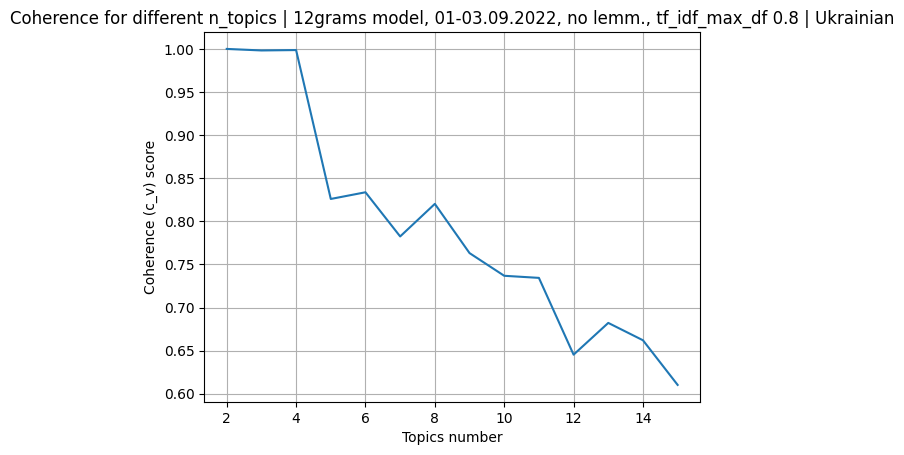

In [66]:
Plotter().plot_coherences(
    topic_numbers=TOPICS_NUMBERS_CALCULATE,
    coherences=coherences_list_v2,
    plot_description='12grams model, 01-03.09.2022, no lemm., tf_idf_max_df 0.8',
    lang_description='Ukrainian'
)

As we can see, the optimal topics number for this model is 4 from the Elbow method, as the coherencescore drops off massively after it. Let's find these topics:

In [68]:
LSAPipeline_v2_optimal = LSAPipelineUkrainian(preprocessed_documents_pos_v2, tf_idf_max_df=0.8, tf_idf_min_df=4,
                                      lsa_components=4, svd_n_iter=5,
                                      n_top_words=10, ngram_range=(1,2),
                                      lemmatize=False,
                                      import_preprocessed_documents=True,
                                      random_state=47)
topics_v2_optimal = LSAPipeline_v2_optimal.run_topics_detection()

In [69]:
topics_v2_optimal

[['путін',
  'путін ukrainian',
  'ідіть ебать',
  'ебать путін',
  'ukrainian',
  'ебать',
  'ідіть',
  'всі',
  'helpukraine',
  'ukraine'],
 ['шо',
  'бо',
  'всі',
  'фото',
  'щось',
  'хочу',
  'ukraine',
  'вересня',
  'те',
  'людей'],
 ['фото',
  'ukraine',
  'kyiv',
  'kyiv ukraine',
  'только что',
  'опубликовано',
  'что опубликовано',
  'опубликовано фото',
  'что',
  'только'],
 ['бо',
  'всі',
  'щось',
  'хочу',
  'вересня',
  'зсу',
  'те',
  'із',
  'україні',
  'люблю']]

As we can see, there is clear thematic closeness between the topics keywords, though at the 4 topics the topcs 2 and 4 are already becoming close. This highlights of the features of the algorithm - in order to find more topics it is important to also review the semantic closeness of the topics in the several first keywords.